# ซ้อม visualization

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_weather = pd.read_csv('weather_2016_2020_daily.csv')
df_power = pd.read_csv('power_usage_2016_to_2020.csv')

In [3]:
df_weather.head(3)

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6


In [4]:
df_power.head(3)

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday


* Split a string column into two

In [5]:
df_power[['Date','Time']] = df_power['StartDate'].str.split(' ',expand = True)

In [6]:
df_power = df_power.drop('StartDate',axis = 1)

In [7]:
df_power.head(3)

,Value (kWh),day_of_week,notes,Date,Time
0,1.057,2,weekday,2016-01-06,00:00:00
1,1.171,2,weekday,2016-01-06,01:00:00
2,0.560,2,weekday,2016-01-06,02:00:00


* เชื่อมสองตารางเข้าด้วยกัน

In [8]:
# ตรวจความสัมพันธ์ของ column
def relation(df, col1, col2):
    first = df.groupby(col1)[col2].count().max()
    second = df.groupby(col2)[col1].count().max()
    print(first,second)
    if first == 1 and second > 1:
        return 'ManyToOne'
    elif first > 1 and second == 1:
        return 'OneToMany'
    else:
        return 'OneToOne'  

In [9]:
relation(df_weather,'Date','Day')

1 51


'ManyToOne'

In [10]:
df = df_power.merge(df_weather, how = 'left', on = 'Date')

In [11]:
df

,Value (kWh),day_of_week_x,notes,Date,Time,Day,Temp_max,Temp_avg,Temp_min,Dew_max,...,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week_y
0,1.057,2,weekday,2016-01-06,00:00:00,1,85,74.8,68,74,...,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0,2
1,1.171,2,weekday,2016-01-06,01:00:00,1,85,74.8,68,74,...,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0,2
2,0.560,2,weekday,2016-01-06,02:00:00,1,85,74.8,68,74,...,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0,2
3,0.828,2,weekday,2016-01-06,03:00:00,1,85,74.8,68,74,...,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0,2
4,0.932,2,weekday,2016-01-06,04:00:00,1,85,74.8,68,74,...,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,1.307,1,weekday,2020-07-07,19:00:00,7,93,84.5,80,80,...,76.6,53,15,6.1,0,29.9,29.8,29.8,0.0,1
35948,2.872,1,weekday,2020-07-07,20:00:00,7,93,84.5,80,80,...,76.6,53,15,6.1,0,29.9,29.8,29.8,0.0,1
35949,2.138,1,weekday,2020-07-07,21:00:00,7,93,84.5,80,80,...,76.6,53,15,6.1,0,29.9,29.8,29.8,0.0,1
35950,2.199,1,weekday,2020-07-07,22:00:00,7,93,84.5,80,80,...,76.6,53,15,6.1,0,29.9,29.8,29.8,0.0,1


In [12]:
relation(df,'day_of_week_x','day_of_week_y')

5184 5184


'OneToOne'

In [13]:
df.day_of_week_x.equals(df.day_of_week_y)

True

In [14]:
df = df.drop('day_of_week_y',axis = 1)

In [15]:
df.head(3)

,Value (kWh),day_of_week_x,notes,Date,Time,Day,Temp_max,Temp_avg,Temp_min,Dew_max,...,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,1.057,2,weekday,2016-01-06,00:00:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
1,1.171,2,weekday,2016-01-06,01:00:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
2,0.560,2,weekday,2016-01-06,02:00:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0


# 2 Dimension plot
* Day, Time, day_of_week_x, notes 
* kWh

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

* Barchart

พลังงานที่ใช้โดยเฉลี่ยในแต่ละวัน แบ่งเป็นช่วงเวลา

In [17]:
df_plot = df.copy()
# กรณีสร้างเดือน ปี
df_plot = pd.DataFrame(data = {'MONTH':pd.to_datetime(df['Date']).dt.month
                              ,'DATE': df['Date'].values
                              ,'Value (kWh)' : df['Value (kWh)'].values
                              ,'day_of_week' : df['day_of_week_x'].values
                              ,'special day' : df['notes'].values
                                })

# groupby ... Date , Time, day_of_week
df_plot_month = df_plot.groupby('MONTH').mean()

# 

In [18]:
df_plot

,MONTH,DATE,Value (kWh),day_of_week,special day
0,1,2016-01-06,1.057,2,weekday
1,1,2016-01-06,1.171,2,weekday
2,1,2016-01-06,0.560,2,weekday
3,1,2016-01-06,0.828,2,weekday
4,1,2016-01-06,0.932,2,weekday
...,...,...,...,...,...
35947,7,2020-07-07,1.307,1,weekday
35948,7,2020-07-07,2.872,1,weekday
35949,7,2020-07-07,2.138,1,weekday
35950,7,2020-07-07,2.199,1,weekday


In [19]:
df_plot_month

,Value (kWh),day_of_week
MONTH,,
1,0.637175,2.873016
2,0.657002,3.026087
3,0.682475,3.079365
4,0.730380,2.950820
5,0.952676,2.968254
6,1.220692,3.021429
7,1.262857,2.992063
8,1.318578,2.984000
9,1.133567,3.074380


C:\Users\Tan\AppData\Local\Temp\ipykernel_12956\2446527935.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  xtick_label = axes.set_xticklabels(pd.to_datetime(df[:4000].iloc[::freq]["Date"]).dt.strftime("%d-%b-%y"), rotation = 90)


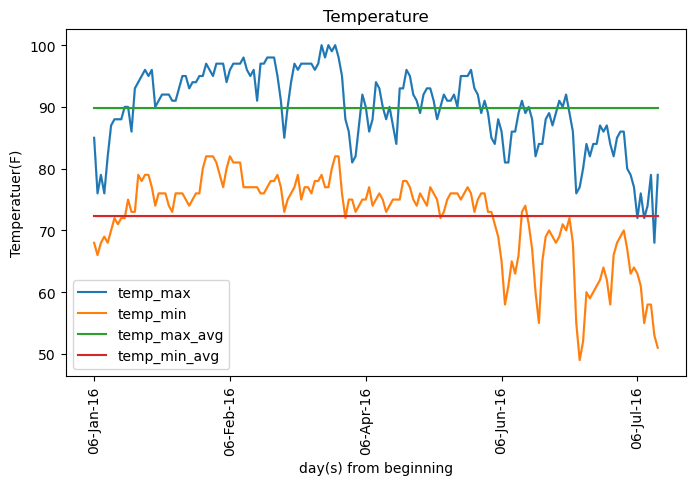

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 4.5)
plt.subplots_adjust(hspace=0.2)
# plot temp max และ temp min
line_temp_max = sns.lineplot(ax = axes ,x= df.Date[:4000], y='Temp_max', data=df[:4000], label = 'temp_max')
line_temp_min = sns.lineplot(ax = axes ,x= df.Date[:4000], y='Temp_min', data=df[:4000], label = 'temp_min')
# เส้นเฉลี่ย
temp_max_avg = sns.lineplot(ax = axes ,x= df.Date[:4000], y=np.ones(df[:4000]['Temp_max'].shape[0])*df[:4000]['Temp_max'].mean()
                            , data=df[:4000], label = 'temp_max_avg')
temp_min_avg = sns.lineplot(ax = axes ,x= df.Date[:4000], y=np.ones(df[:4000]['Temp_min'].shape[0])*df[:4000]['Temp_min'].mean()
                            , data=df[:4000], label = 'temp_min_avg')
axes.legend()
# Set label and title
axes.set_title('Temperature')
axes.set_ylabel("Temperatuer(F)")
axes.set_xlabel("day(s) from beginning")

freq = int(40)
xtick_label = axes.set_xticklabels(pd.to_datetime(df[:4000].iloc[::freq]["Date"]).dt.strftime("%d-%b-%y"), rotation = 90)
xtix = axes.get_xticks()
xtick = axes.set_xticks(xtix[::freq])

In [21]:
axes

<AxesSubplot:title={'center':'Temperature'}, xlabel='day(s) from beginning', ylabel='Temperatuer(F)'>

# สร้างค่าจากเงื่อนไข

In [22]:
df_weekday = df_plot.groupby('day_of_week').mean()
df_weekday

,MONTH,Value (kWh)
day_of_week,,
0,6.464789,0.861824
1,6.486111,0.870365
2,6.481308,0.866909
3,6.488372,0.903988
4,6.507042,0.883665
5,6.535211,0.919860
6,6.570093,0.934904


In [23]:
import numpy as np
week = 1
value_by_week = lambda week: np.where(df_weekday.index == week, df_weekday['Value (kWh)'], 0)

for week in df_weekday.index.tolist():
    df_weekday[f'value by {week}'] = value_by_week(week)

In [24]:
df_weekday

,MONTH,Value (kWh),value by 0,value by 1,value by 2,value by 3,value by 4,value by 5,value by 6
day_of_week,,,,,,,,,
0,6.464789,0.861824,0.861824,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,6.486111,0.870365,0.000000,0.870365,0.000000,0.000000,0.000000,0.00000,0.000000
2,6.481308,0.866909,0.000000,0.000000,0.866909,0.000000,0.000000,0.00000,0.000000
3,6.488372,0.903988,0.000000,0.000000,0.000000,0.903988,0.000000,0.00000,0.000000
4,6.507042,0.883665,0.000000,0.000000,0.000000,0.000000,0.883665,0.00000,0.000000
5,6.535211,0.919860,0.000000,0.000000,0.000000,0.000000,0.000000,0.91986,0.000000
6,6.570093,0.934904,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.934904


In [25]:
def value_assign(value_actual, value_expected, value_if, value_else):
    if False not in list(map(lambda x,y: x == y , value_actual, value_expected)):
        return value_if
    else:
        return value_else

In [26]:
value_assign([1,2,3],[1,2,3],'matched','not matched')

'matched'

In [27]:
df_plot['condition'] = df_plot.apply(lambda x: value_assign([x['day_of_week'] , x['special day'], x['Value (kWh)']]
                                                            , [2,'weekday',1.057]
                                                            , 'On condition'
                                                            , 'Out of condition'), axis = 1)


In [28]:
df_plot[df_plot['condition'] == 'On condition']

,MONTH,DATE,Value (kWh),day_of_week,special day,condition
0,1,2016-01-06,1.057,2,weekday,On condition


In [29]:
pd.to_datetime(df.Date).dt.month

0        1
1        1
2        1
3        1
4        1
        ..
35947    7
35948    7
35949    7
35950    7
35951    7
Name: Date, Length: 35952, dtype: int64

* นำไปใช้ทำข้อมูล

In [30]:
df_weekday = pd.DataFrame({'month':pd.to_datetime(df.Date).dt.month,
                           'year':pd.to_datetime(df.Date).dt.year
                          })
for day in pd.Series(df.day_of_week_x.unique()).sort_values():
    df_weekday[f'day_{day}'] = df.apply(lambda x: value_assign([x['day_of_week_x']]
                                                            , [day]
                                                            , x['Value (kWh)']
                                                            , 0), axis = 1)


In [31]:
df_weekday

,month,year,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1,2016,0.0,0.000,1.057,0.0,0.0,0.0,0.0
1,1,2016,0.0,0.000,1.171,0.0,0.0,0.0,0.0
2,1,2016,0.0,0.000,0.560,0.0,0.0,0.0,0.0
3,1,2016,0.0,0.000,0.828,0.0,0.0,0.0,0.0
4,1,2016,0.0,0.000,0.932,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
35947,7,2020,0.0,1.307,0.000,0.0,0.0,0.0,0.0
35948,7,2020,0.0,2.872,0.000,0.0,0.0,0.0,0.0
35949,7,2020,0.0,2.138,0.000,0.0,0.0,0.0,0.0
35950,7,2020,0.0,2.199,0.000,0.0,0.0,0.0,0.0


In [32]:
year_mo_weekday = df_weekday.groupby(['year','month']).mean()
year_mo_weekday

day_0     day_1     day_2     day_3     day_4     day_5  \
year month                                                               
2016 1      0.128185  0.077268  0.176732  0.257006  0.297958  0.281923   
     2      0.283155  0.143435  0.142524  0.163548  0.069113  0.171363   
     3      0.375006  0.295036  0.035036  0.182952  0.194042  0.079054   
     4      0.188601  0.119482  0.136208  0.350643  0.294780  0.035625   
     5      0.259024  0.209720  0.182845  0.086786  0.149970  0.269286   
     6      0.246695  0.268650  0.292035  0.267780  0.186723  0.180427   
     7      0.122465  0.090224  0.214441  0.231218  0.309683  0.282074   
     8      0.241147  0.233966  0.236032  0.145014  0.118143  0.263875   
     9      0.150972  0.246808  0.264632  0.332359  0.237337  0.200428   
     10     0.165043  0.121178  0.119819  0.223867  0.167030  0.193284   
     11     0.155990  0.190007  0.154205  0.117640  0.069693  0.054783   
     12     0.045306  0.109468  0.111505  0.137939  0.113144  0.107861   
2017 1      0.095243  0.097715  0.057094  0.059116  0.075405  0.078224   
     2      0.088970  0.077621  0.055897  0.092780  0.081064  0.087555   
     3      0.105629  0.083302  0.090153  0.107216  0.089026  0.093184   
     4      0.089300  0.100657  0.083135  0.112337  0.125082  0.152156   
     5      0.102931  0.130960  0.126392  0.112067  0.110457  0.168351   
     6      0.121097  0.140811  0.161596  0.140468  0.149232  0.107408   
     7      0.128430  0.100030  0.114594  0.160306  0.147926  0.121524   
     8      0.176546  0.156595  0.171081  0.197272  0.117753  0.131648   
     9      0.112456  0.105803  0.129344  0.162690  0.146071  0.178635   
     10     0.080703  0.085855  0.071806  0.073088  0.100512  0.122026   
     11     0.087404  0.078900  0.082261  0.086907  0.067674  0.073400   
     12     0.064531  0.066093  0.080069  0.074290  0.094216  0.091075   
2018 1      0.109489  0.123794  0.134968  0.079281  0.068145  0.065766   
     2      0.075208  0.084933  0.105533  0.101027  0.095680  0.117480   
     3      0.085468  0.123464  0.093005  0.112394  0.078267  0.141951   
     4      0.090693  0.129651  0.085281  0.061218  0.107075  0.088028   
     5      0.124609  0.138927  0.124266  0.188704  0.104844  0.130181   
     6      0.145722  0.144372  0.190133  0.192812  0.234219  0.207289   
     7      0.244970  0.232637  0.167704  0.156340  0.213261  0.235382   
     8      0.225887  0.202216  0.198719  0.225634  0.222887  0.165828   
     9      0.146882  0.127539  0.132636  0.141374  0.142893  0.184206   
     10     0.145363  0.090026  0.111391  0.051047  0.080907  0.135226   
     11     0.091876  0.102193  0.095783  0.114167  0.092246  0.076675   
     12     0.092606  0.054777  0.088000  0.082374  0.096647  0.112337   
2019 1      0.089728  0.104891  0.106724  0.094336  0.060126  0.076915   
     2      0.066997  0.077537  0.103055  0.085624  0.097853  0.104451   
     3      0.054008  0.069722  0.099536  0.069496  0.085720  0.105083   
     4      0.111115  0.134517  0.092576  0.071407  0.080440  0.089158   
     5      0.111257  0.121384  0.162426  0.141324  0.113294  0.080183   
     6      0.116921  0.116096  0.126542  0.159542  0.211681  0.212413   
     7      0.218153  0.218555  0.173527  0.120125  0.120913  0.192395   
     8      0.153829  0.211848  0.231153  0.226441  0.223914  0.193511   
     9      0.181015  0.103871  0.101881  0.110325  0.168703  0.182621   
     10     0.125035  0.123328  0.104208  0.099513  0.067608  0.081277   
     11     0.056626  0.068238  0.082594  0.102181  0.106149  0.094413   
     12     0.071138  0.054809  0.059714  0.059813  0.078441  0.083216   
2020 1      0.088075  0.115670  0.057615  0.065591  0.068080  0.049857   
     2      0.053656  0.055021  0.066243  0.116356  0.135358  0.074628   
     3      0.071681  0.086163  0.074641  0.085619  0.116699  0.120357   
     4      0.125022  0.137500  0.085690  0.094582  0.066995  0.054613   
     5      0.09479

* Pivot

In [33]:
df2 = df.copy()
df2['month'] = pd.to_datetime(df.Date).dt.month
df2['year'] = pd.to_datetime(df.Date).dt.year
pivot = pd.pivot_table(df2,index = ['year','month'],columns = 'day_of_week_x',values = 'Value (kWh)', aggfunc= np.max )
pivot

day_of_week_x      0      1      2      3      4       5      6
year month                                                     
2016 1         3.316  1.096  3.647  5.139  5.228  5.2370  4.727
     2         4.924  5.244  3.167  4.492  1.198  3.4080  5.317
     3         6.446  5.256  0.288  3.794  4.300  1.2590  2.164
     4         3.485  2.130  3.027  4.840  5.081  0.3090  4.225
     5         4.810  4.657  3.170  1.427  2.440  5.3430  5.102
     6         5.064  5.264  5.485  5.208  5.317  5.4300  5.195
     7         4.133  4.059  5.231  5.318  5.263  5.1430  5.198
     8         5.083  4.685  4.733  3.479  4.543  4.7540  5.189
     9         5.194  5.001  5.033  5.150  5.012  5.3700  5.200
     10        4.539  4.996  4.079  5.155  5.181  5.4700  4.790
     11        5.194  5.488  4.098  3.523  1.845  0.9620  5.416
     12        1.174  4.420  5.138  5.352  4.571  4.3300  2.028
2017 1         4.180  3.166  2.044  2.242  2.869  2.4250  1.896
     2         3.075  2.678  1.209  3.725  2.678  2.1260  4.335
     3         4.552  2.824  2.272  3.536  2.558  2.5870  4.029
     4         3.123  2.737  2.184  2.925  4.329  3.4970  3.254
     5         2.895  3.371  3.718  4.166  3.764  4.9860  4.613
     6         4.772  4.356  4.721  2.753  4.806  2.9740  4.992
     7         3.678  5.180  4.679  4.948  4.528  3.2280  4.107
     8         4.961  4.635  4.655  5.607  4.575  4.2700  4.392
     9         3.708  4.099  3.660  5.288  4.144  3.9460  4.014
     10        2.764  2.196  2.360  2.900  3.645  4.1080  4.446
     11        3.194  4.218  2.380  2.954  2.053  3.2950  2.668
     12        2.429  2.625  4.592  3.768  4.568  3.9060  2.716
2018 1         4.525  4.919  5.057  2.138  2.242  2.7090  4.234
     2         3.380  4.849  4.289  4.555  3.845  2.4008  3.120
     3         4.038  4.654  4.561  4.455  2.221  3.6140  3.841
     4         2.920  4.497  2.728  2.163  4.114  3.1910  2.174
     5         4.567  4.151  3.953  4.759  3.762  4.0480  4.867
     6         4.721  4.617  4.883  4.631  4.790  4.8730  4.398
     7         4.621  4.643  4.641  4.774  4.959  4.7750  4.677
     8         4.970  4.767  5.090  4.956  4.753  5.1780  4.305
     9         4.598  4.545  3.813  3.986  3.275  3.5250  4.078
     10        4.424  3.271  4.633  0.929  4.382  4.6510  3.837
     11        4.514  4.912  4.225  3.939  2.668  2.5070  1.080
     12        2.738  1.033  3.184  4.548  3.993  4.0550  3.325
2019 1         3.461  3.828  3.696  2.796  1.186  2.0260  1.695
     2         1.121  1.880  4.677  2.768  2.969  4.5040  2.996
     3         1.844  3.516  3.483  2.895  2.493  2.8730  2.067
     4         3.857  4.304  2.862  2.249  3.351  3.1400  3.376
     5         3.455  3.943  4.084  3.903  2.882  2.6560  3.226
     6         2.956  3.533  3.818  4.385  5.311  4.5590  5.328
     7         4.111  4.242  4.072  3.969  5.056  4.3470  4.282
     8         4.393  4.855  5.068  3.920  5.169  4.3750  4.332
     9         3.365  3.371  3.149  2.868  3.461  4.1730  3.822
     10        4.232  3.273  2.900  2.723  2.119  4.1930  3.127
     11        2.042  2.292  2.988  4.763  4.364  2.4670  2.048
     12        2.326  1.696  2.006  2.469  3.176  4.8770  4.375
2020 1         2.805  4.133  1.139  1.176  0.997  1.1150  1.756
     2         1.489  1.100  2.176  3.732  3.424  1.4980  1.054
     3         2.267  3.035  2.940  3.898  2.778  3.3020  2.123
     4         2.961  3.763  2.638  3.483  2.868  1.6910  3.123
     5         3.232  3.282  3.750  3.890  3.989  3.7590  2.666
     6         3.112  4.249  2.784  2.711  2.649  3.8210  4.151
     7         3.558  3.212  0.713  1.076  1.110  3.0140  2.739
     8         0.827  2.931  2.322  3.512    NaN  0.7990  0.653
     9           NaN  0.894  0.773  0.581  2.367  1.3970  4.287
     10        2.353  2.860    NaN  0.706  0.902  0.5870  2.045
     11        0.774  0.553  2.412  2.745  2.399     NaN  0.766
     12          NaN  0.810  0.967  2.668  2.822  2.1220  3.097

* เปรียบเทียบการใช้ไฟในแต่ละวัน

In [34]:
feb_weekday = pivot.filter(items=[(i,2) for i in range(2016,2021)], axis='index')
feb_weekday

,day_of_week_x,0,1,2,3,4,5,6
year,month,,,,,,,
2016,2,4.924,5.244,3.167,4.492,1.198,3.4080,5.317
2017,2,3.075,2.678,1.209,3.725,2.678,2.1260,4.335
2018,2,3.380,4.849,4.289,4.555,3.845,2.4008,3.120
2019,2,1.121,1.880,4.677,2.768,2.969,4.5040,2.996
2020,2,1.489,1.100,2.176,3.732,3.424,1.4980,1.054


In [35]:
axes

<AxesSubplot:title={'center':'Temperature'}, xlabel='day(s) from beginning', ylabel='Temperatuer(F)'>

C:\Users\Tan\AppData\Local\Temp\ipykernel_12956\2708812409.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticks = axes.set_xticklabels([f'{i[0]}-{i[1]}' for i in pivot.index], size = 8.5 , rotation = 90)


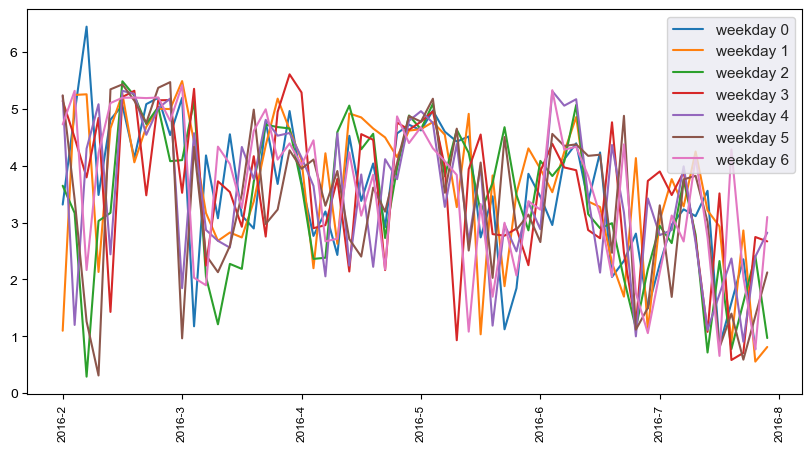

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 5)
sns.set_theme(style="darkgrid")
for i in pivot.columns:
    average_line = sns.lineplot(ax = axes, data=pivot[i].values, label = f'weekday {i}')
xticks = axes.set_xticklabels([f'{i[0]}-{i[1]}' for i in pivot.index], size = 8.5 , rotation = 90)

In [37]:
feb_weekday = pivot.filter(items=[(i,2) for i in range(2016,2021)], axis='index')
feb_weekday

,day_of_week_x,0,1,2,3,4,5,6
year,month,,,,,,,
2016,2,4.924,5.244,3.167,4.492,1.198,3.4080,5.317
2017,2,3.075,2.678,1.209,3.725,2.678,2.1260,4.335
2018,2,3.380,4.849,4.289,4.555,3.845,2.4008,3.120
2019,2,1.121,1.880,4.677,2.768,2.969,4.5040,2.996
2020,2,1.489,1.100,2.176,3.732,3.424,1.4980,1.054


In [38]:
feb_weekday.index

MultiIndex([(2016, 2),
            (2017, 2),
            (2018, 2),
            (2019, 2),
            (2020, 2)],
           names=['year', 'month'])

* filter เยอะๆ

In [39]:
df[df.eval("day_of_week_x <=3 & (Temp_max <90) & (Temp_min > 60)")]

,Value (kWh),day_of_week_x,notes,Date,Time,Day,Temp_max,Temp_avg,Temp_min,Dew_max,...,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,1.057,2,weekday,2016-01-06,00:00:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00
1,1.171,2,weekday,2016-01-06,01:00:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00
2,0.560,2,weekday,2016-01-06,02:00:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00
3,0.828,2,weekday,2016-01-06,03:00:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00
4,0.932,2,weekday,2016-01-06,04:00:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35659,0.960,3,COVID_lockdown,2020-06-25,19:00:00,25,87,76.6,73,76,...,97,87.8,65,12,4.9,0,29.9,29.8,29.8,1.12
35660,1.691,3,COVID_lockdown,2020-06-25,20:00:00,25,87,76.6,73,76,...,97,87.8,65,12,4.9,0,29.9,29.8,29.8,1.12
35661,1.890,3,COVID_lockdown,2020-06-25,21:00:00,25,87,76.6,73,76,...,97,87.8,65,12,4.9,0,29.9,29.8,29.8,1.12
35662,1.173,3,COVID_lockdown,2020-06-25,22:00:00,25,87,76.6,73,76,...,97,87.8,65,12,4.9,0,29.9,29.8,29.8,1.12


<AxesSubplot:xlabel='day_of_week_x', ylabel='Value (kWh)'>

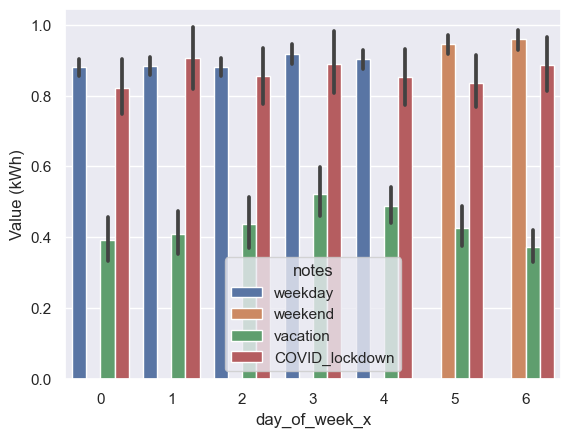

In [40]:
sns.barplot(data=df, x='day_of_week_x', y='Value (kWh)', hue='notes')